# Tarea - Ajuste de curvas

Nombre: Israel Santiago Gómez

Materia: Simulación matemática

Fecha: 14/09/2023

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [3]:
import numpy as np


data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

x = np.linspace(0,26,len(data))


1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [4]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt


def funcion_de_costo(beta, X, y, size):
    beta = np.reshape(beta,[size,-1]) 
    pred= X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo [0][0]

# Construyendo matrices X
ones = np.ones([len(data),1])
x_1 = np.reshape(x,[len(data),-1])
x_2 = np.reshape(x**2,[len(data),-1])
x_3 = np.reshape(x**3,[len(data),-1])

X1 = np.hstack((ones,x_1))
X2 = np.hstack((ones,x_1,x_2))
X3 = np.hstack((ones,x_1,x_2,x_3))

beta_inicial_1 = np.random.rand(2)
beta_inicial_2 = np.random.rand(3)
beta_inicial_3= np.random.rand(4)

y = np.reshape(data,[len(data),-1])

y = np.reshape(data,[len(data),-1])

sol1 = opt.minimize(funcion_de_costo,beta_inicial_1,args=(X1,y,2))
sol2 = opt.minimize(funcion_de_costo,beta_inicial_2,args=(X2,y,3))
sol3 = opt.minimize(funcion_de_costo,beta_inicial_3,args=(X1,y,2))


In [5]:
sol1

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.3704889518144845
        x: [ 9.116e+00  1.867e-01]
      nit: 3
      jac: [-4.441e-06  8.851e-06]
 hess_inv: [[ 7.011e-02 -3.968e-03]
            [-3.968e-03  3.053e-04]]
     nfev: 21
     njev: 7

In [6]:
sol2

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.8443845194032094
        x: [ 9.591e+00  7.252e-02  4.390e-03]
      nit: 8
      jac: [ 0.000e+00  4.470e-08  1.088e-06]
 hess_inv: [[ 1.442e-01 -2.176e-02  6.842e-04]
            [-2.176e-02  4.575e-03 -1.642e-04]
            [ 6.842e-04 -1.642e-04  6.316e-06]]
     nfev: 48
     njev: 12

In [7]:
sol3

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.3704889518153776
        x: [ 9.116e+00  1.326e-01  1.867e-01  4.022e-02]
      nit: 4
      jac: [ 0.000e+00  0.000e+00 -2.980e-08  0.000e+00]
 hess_inv: [[ 7.011e-02  0.000e+00 -3.968e-03  0.000e+00]
            [ 0.000e+00  1.000e+00  0.000e+00  0.000e+00]
            [-3.968e-03  0.000e+00  3.053e-04  0.000e+00]
            [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]]
     nfev: 30
     njev: 6

In [8]:
y_pred_1 = 9.11567699 + 0.18667052*x
y_pred_2 = 9.59128644e+00 + 7.25241290e-02*x + 4.39024717e-03*x**2
y_pred_3 = 9.56752339e+00 + 8.46505952e-02*x + 3.20195529e-03*x**2 + 3.04690690e-05*x**3

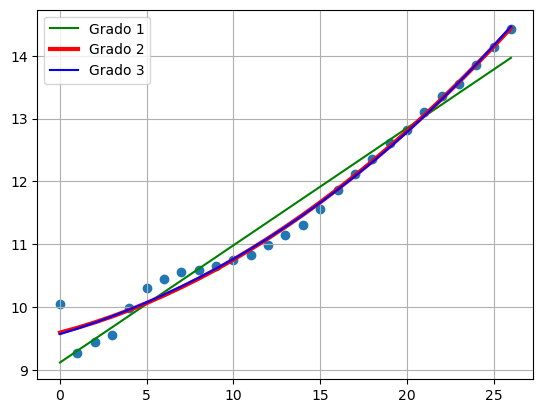

In [9]:
plt.figure()
plt.scatter(x,data)
plt.plot(x,y_pred_1,"g",label='Grado 1')
plt.plot(x,y_pred_2,"r",label='Grado 2',linewidth=3)
plt.plot(x,y_pred_3,"b",label='Grado 3')
plt.legend()
plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

## Punto 1

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('population_data.csv')

years = data['Year']
poblacion = np.array(data['Poblacion'])

poblacion


array([ 28296,  29110,  29980,  30904,  31880,  32906,  33978,  35095,
        36253,  37448,  38677,  39939,  41234,  42564,  43931,  45339,
        46784,  48264,  49788,  51361,  52988,  54669,  56396,  58156,
        59931,  61708,  63486,  65261,  67013,  68715,  70353,  71916,
        73416,  74880,  76351,  77859,  79410,  80999,  82635,  84327,
        86077,  87890,  89758,  91654,  93542,  95393,  97202,  98969,
       100679, 102317, 103874, 105340, 106724, 108056, 109382, 110732,
       112117, 113530, 114968, 116423, 114255, 115683, 117054, 118395,
       119713, 121005], dtype=int64)

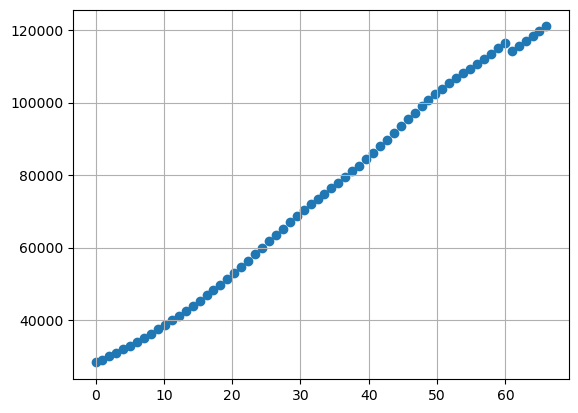

In [11]:
c = len(poblacion)
x = np.linspace(0, c, c)

plt.figure()
plt.scatter(x,poblacion)
plt.grid()

In [12]:
def funcion_costo(beta, X, y, size):
    beta = np.reshape(beta,[size,-1]) 
    pred= X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo [0][0]

ones = np.ones([c,1])
x_1 = np.reshape(x,[c,-1])
x_2 = np.reshape(x**2,[c,-1])
x_3 = np.reshape(x**3,[c,-1])

X1 = np.hstack((ones,x_1))
X2 = np.hstack((ones,x_1,x_2))
X3 = np.hstack((ones,x_1,x_2,x_3))

beta_inicial_1 = np.random.rand(2)
beta_inicial_2 = np.random.rand(3)
beta_inicial_3= np.random.rand(4)

y = np.reshape(poblacion,[c,-1])

In [13]:
sol1 = opt.minimize(funcion_costo,beta_inicial_1,args=(X1,y,2))
sol1

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 212137169.54520983
        x: [ 2.414e+04  1.521e+03]
      nit: 7
      jac: [ 4.000e+00  4.600e+01]
 hess_inv: [[ 4.819e-02 -8.465e-04]
            [-8.465e-04  1.894e-05]]
     nfev: 192
     njev: 60

In [14]:
sol2 = opt.minimize(funcion_costo,beta_inicial_2,args=(X2,y,3))
sol2

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 210941621.44973797
        x: [ 2.443e+04  1.494e+03  4.023e-01]
      nit: 14
      jac: [ 0.000e+00  2.000e+00  6.000e+00]
 hess_inv: [[ 8.040e-03  8.847e-10 -1.493e-09]
            [ 8.847e-10  1.678e-12 -6.087e-13]
            [-1.493e-09 -6.087e-13  9.749e-13]]
     nfev: 350
     njev: 82

In [15]:
sol3 = opt.minimize(funcion_costo,beta_inicial_3,args=(X3,y,4))
sol3


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 25240442.640299525
        x: [ 2.848e+04  7.279e+02  2.965e+01 -2.954e-01]
      nit: 9
      jac: [ 2.500e-01  3.500e+00  1.000e+01  1.425e+01]
 hess_inv: [[ 1.028e-01 -9.798e-03  2.681e-04 -2.214e-06]
            [-9.798e-03  1.294e-03 -4.191e-05  3.838e-07]
            [ 2.681e-04 -4.191e-05  1.512e-06 -1.485e-08]
            [-2.214e-06  3.838e-07 -1.485e-08  1.528e-10]]
     nfev: 267
     njev: 51

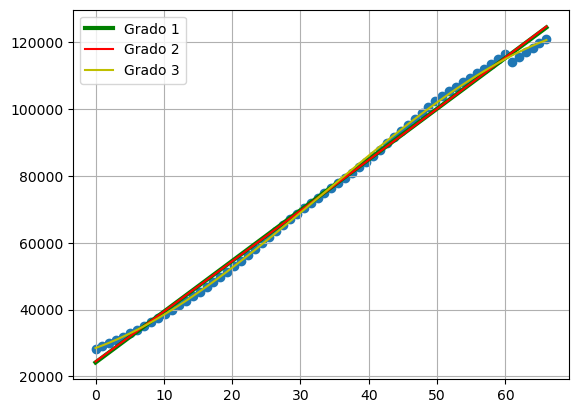

In [16]:
y_pred_1 = 24138.02647302 + 1520.57963288*x
y_pred_2 = 2.44255665e+04 + 1.49402932e+03*x + 4.02286037e-01*x**2
y_pred_3 = 2.84777249e+04 + 7.27885869e+02*x + 2.96455154e+01*x**2 - 2.95386224e-01*x**3



plt.figure()
plt.scatter(x,poblacion)
plt.plot(x,y_pred_1,"g",label='Grado 1',linewidth=3)
plt.plot(x,y_pred_2,"r",label='Grado 2')
plt.plot(x,y_pred_3,"y",label='Grado 3')
plt.legend()
plt.grid()

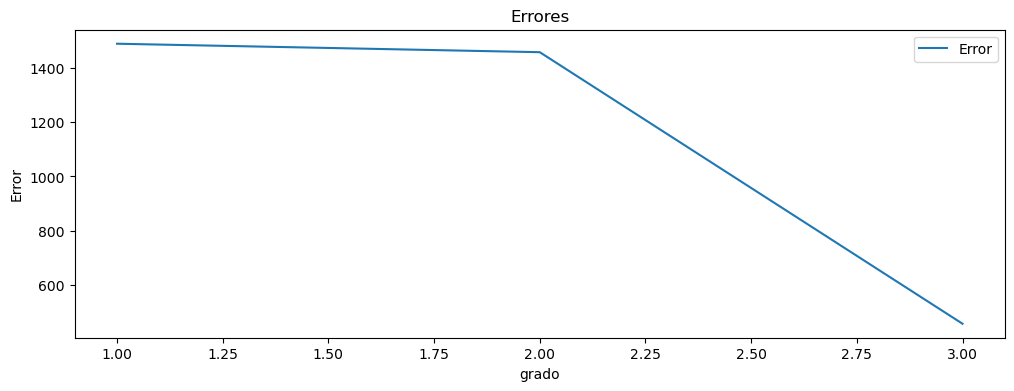

In [19]:
y2 = np.array(data['Poblacion'])

error_1 = np.mean(abs(y2 - y_pred_1))
error_2 = np.mean(abs(y2 - y_pred_2))
error_3=  np.mean(abs(y2 - y_pred_3))

y_e = [error_1, error_2, error_3]
x_e = [1, 2, 3]

plt.figure(figsize=(12, 4))

plt.plot(x_e, y_e, label='Error')
plt.title('Errores')
plt.xlabel('grado')
plt.ylabel('Error')
plt.legend()

## Punto 2

In [20]:

data = pd.read_csv('population_data.csv')

nacimientos = np.array(data['Nacimientos'])

nacimientos

array([1174947, 1183788, 1195209, 1261775, 1339837, 1377917, 1427722,
       1485202, 1447578, 1589606, 1608174, 1647006, 1705481, 1756624,
       1849408, 1888171, 1954340, 1981363, 2058251, 2037561, 2132630,
       2231399, 2346002, 2572287, 2522580, 2254497, 2366305, 2379327,
       2346862, 2274267, 2446238, 2530662, 2392849, 2609088, 2511894,
       2655671, 2577045, 2794390, 2622031, 2620262, 2735312, 2756447,
       2797397, 2839686, 2904389, 2750444, 2707718, 2698425, 2668429,
       2769089, 2798339, 2767610, 2699084, 2655894, 2625056, 2567906,
       2505939, 2655083, 2636110, 2577214, 2643908, 2586287, 2498880,
       2478889, 2463420, 2353596], dtype=int64)

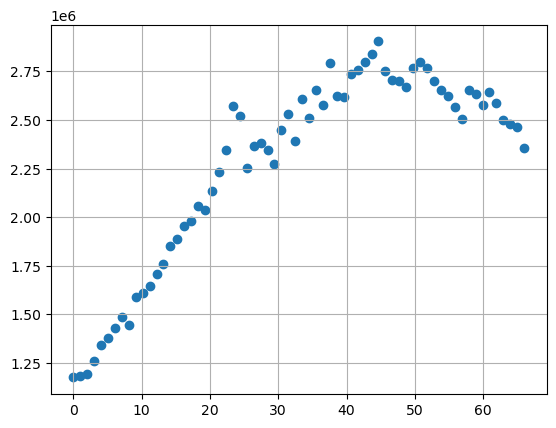

In [21]:
c = len(nacimientos)
x = np.linspace(0,c,c)

plt.figure()
plt.scatter(x,nacimientos)
plt.grid()

In [22]:
ones = np.ones([c,1])
x_1 = np.reshape(x,[c,-1])
x_2 = np.reshape(x**2,[c,-1])
x_3 = np.reshape(x**3,[c,-1])

X1 = np.hstack((ones,x_1))
X2 = np.hstack((ones,x_1,x_2))
X3 = np.hstack((ones,x_1,x_2,x_3))

beta_inicial_1 = np.random.rand(2)
beta_inicial_2 = np.random.rand(3)
beta_inicial_3= np.random.rand(4)

y = np.reshape(nacimientos,[c,-1])


In [23]:
sol1 = opt.minimize(funcion_costo,beta_inicial_1,args=(X1,y,2))
sol1

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 4737926451355.518
        x: [ 1.564e+06  2.162e+04]
      nit: 5
      jac: [ 0.000e+00  2.621e+05]
 hess_inv: [[ 2.856e-02 -6.432e-04]
            [-6.432e-04  1.966e-05]]
     nfev: 177
     njev: 55

In [24]:
sol2 = opt.minimize(funcion_costo,beta_inicial_2,args=(X2,y,3))
sol2

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 492921069272.16895
        x: [ 1.021e+06  7.168e+04 -7.581e+02]
      nit: 8
      jac: [ 4.096e+03  4.915e+04  4.915e+04]
 hess_inv: [[ 3.154e+00 -2.270e-01  3.072e-03]
            [-2.270e-01  1.634e-02 -2.211e-04]
            [ 3.072e-03 -2.211e-04  2.995e-06]]
     nfev: 288
     njev: 69

In [25]:
sol3 = opt.minimize(funcion_costo,beta_inicial_3,args=(X3,y,4))
sol3

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 441782404964.14496
        x: [ 1.088e+06  5.896e+04 -2.725e+02 -4.905e+00]
      nit: 20
      jac: [-4.096e+03  5.734e+04  1.597e+05  1.001e+07]
 hess_inv: [[ 3.178e-06 -2.323e-11 -3.672e-10  8.221e-11]
            [-2.323e-11  2.334e-13  2.526e-12 -5.223e-14]
            [-3.672e-10  2.526e-12  2.787e-11 -8.932e-13]
            [ 8.221e-11 -5.223e-14 -8.932e-13  2.298e-13]]
     nfev: 447
     njev: 87

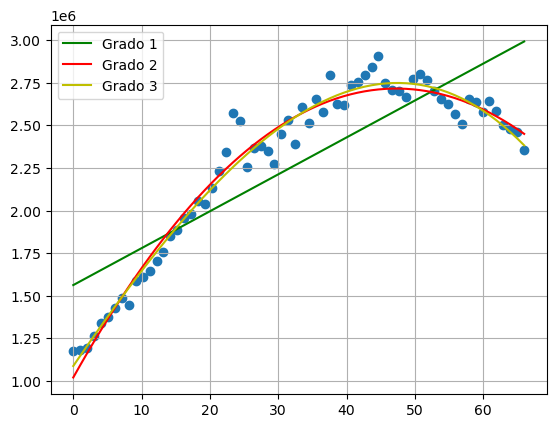

In [26]:
y_pred_1 = 1562990.99542582 + 21643.59351408*x
y_pred_2 = 1.02113758e+06 + 7.16723856e+04*x - 7.58015620e+02*x**2
y_pred_3 = 1.08834110e+06 + 5.89563736e+04*x - 2.72532610e+02*x**2 - 4.90448023e+00*x**3

plt.figure()
plt.scatter(x,nacimientos)
plt.plot(x,y_pred_1,"g",label='Grado 1')
plt.plot(x,y_pred_2,"r",label='Grado 2')
plt.plot(x,y_pred_3,"y",label='Grado 3')
plt.legend()
plt.grid()

In [27]:
#Error acumulado

Text(0, 0.5, 'Error')

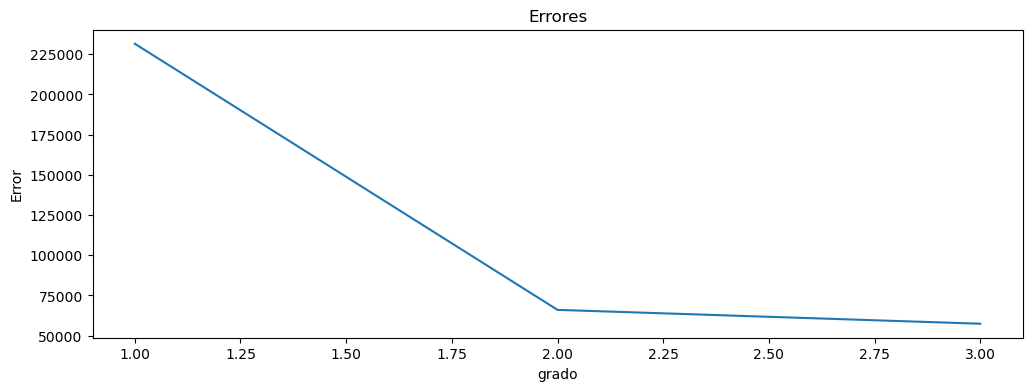

In [31]:
y2 = np.array(data['Nacimientos'])

error_1 = np.mean(abs(y2 - y_pred_1))
error_2 = np.mean(abs(y2 - y_pred_2))
error_3=  np.mean(abs(y2 - y_pred_3))

y_e = [error_1, error_2, error_3]
x_e = [1, 2, 3]

plt.figure(figsize=(12, 4))

plt.plot(x_e, y_e, label='Error')
plt.title('Errores')
plt.xlabel('grado')
plt.ylabel('Error')
